In [115]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [116]:
gate='AND'

In [117]:
x1=[0,0,1,1]
x2=[0,1,0,1]
outputs={'AND':[0,0,0,1],'OR':[0,1,1,1],'NAND':[1,1,1,0],'NOR':[1,0,0,0]}
o=outputs[gate]
target='o'
column_names=['x1','x2',target]
columns_values=list(zip(x1,x2,o))
df = pd.DataFrame(columns_values,
               columns =column_names)
print(df)

   x1  x2  o
0   0   0  0
1   0   1  0
2   1   0  0
3   1   1  1


In [118]:
class Perceptron:
  def __init__(self,df,output):
    self.df=df
    self.output=output
    self.columns=list(self.df.columns)
    self.columns.remove(self.output)
  def getx(self,row,index):
    column=self.columns[index-1]
    x=row[index]
    return x

  def predict_output(self,row):
    predicted_output=self.weights[0]
    for i in range(1,len(self.weights)):
      x=self.getx(row,i)
      predicted_output+=self.weights[i]*x
    return 1 if predicted_output > 0 else 0
  def update_weights(self,row):
    updated_weights=[]
    original_output=row[self.output]
    predicted_output=self.predict_output(row) 
    # print(original_output,predicted_output) 

    delta_w=self.learning_rate*(original_output-predicted_output)    
    self.weights[0]=self.weights[0]+delta_w

    for i in range(1,len(self.weights)):
      x=self.getx(row,i)

      delta_w=self.learning_rate*(original_output-predicted_output)*x      
      self.weights[i]=self.weights[i]+delta_w

  def train(self,learning_rate=0.1,weights=[],iterations=-1):
    self.weights=weights if weights else [random.random() for i in range(len(self.columns)+1)]
    self.iterations=iterations
    self.learning_rate=learning_rate
    self.no_of_iterations=0
    while True:
      flag=True
      for i in range(len(self.df)):
        row=self.df.iloc[i]
        if self.predict_output(row)!=row[self.output]:
          flag=False
        self.update_weights(row)
        # print(self.get_weights())
      if flag or self.no_of_iterations==self.iterations:
        break
      self.no_of_iterations+=1
  def get_weights(self):
    return self.weights
  def get_iters(self):
    return self.no_of_iterations



In [119]:
GATE=Perceptron(df,target)

In [120]:
GATE.train()

In [121]:
for i in range(len(df)):
  row=df.iloc[i]
  print(GATE.predict_output(row))

0
0
0
1


In [122]:
GATE.get_weights()

[-0.4145834287443757, 0.382415079311336, 0.730680577175864]

In [123]:
GATE=Perceptron(df,target)
learning_rate=0
xpoints=[]
ypoints=[]
weights=[random.random() for i in range(len(df.columns))]
for i in range(10):
  learning_rate+=0.1
  learning_rate=round(learning_rate,1)
  GATE.train(learning_rate=learning_rate,weights=copy.deepcopy(weights))
  ypoints.append(GATE.get_iters())
  xpoints.append(learning_rate)

In [124]:
print(xpoints,ypoints)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] [6, 4, 2, 2, 2, 3, 1, 1, 1, 2]


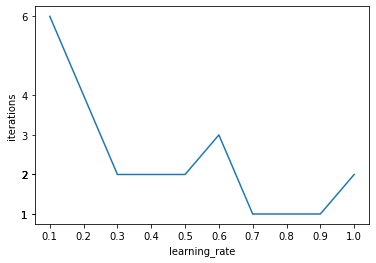

In [125]:
xlabel='learning_rate'
ylabel='iterations'

plt.plot(xpoints,ypoints)

plt.xticks(xpoints)
plt.yticks(ypoints)

plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.show()